In [1]:
from qdisk.model import Keplerian_velocity
from qdisk.classes import FitsImage
import eDiskplot as eplot
from qdisk.utils import is_within
from qdisk.plot import ChannelMap
import analysis_utils as au
from eDisk_source_dict import source_dict
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import AsinhStretch
%matplotlib widget
%load_ext autoreload
%autoreload 2

source = "L1489IRS"
config = "SBLB"
line = "12CO"
robust = 1.0
center_coord = source_dict[source]["radec"]
PA = source_dict[source]["PA"]
incl = source_dict[source]["incl"]
distance = source_dict[source]["distance"]
vsys = source_dict[source]["v_sys"]

/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/qdisk/plot.py:945: UserWarning: No contour levels were found within the data range.
  im = ax.contour(


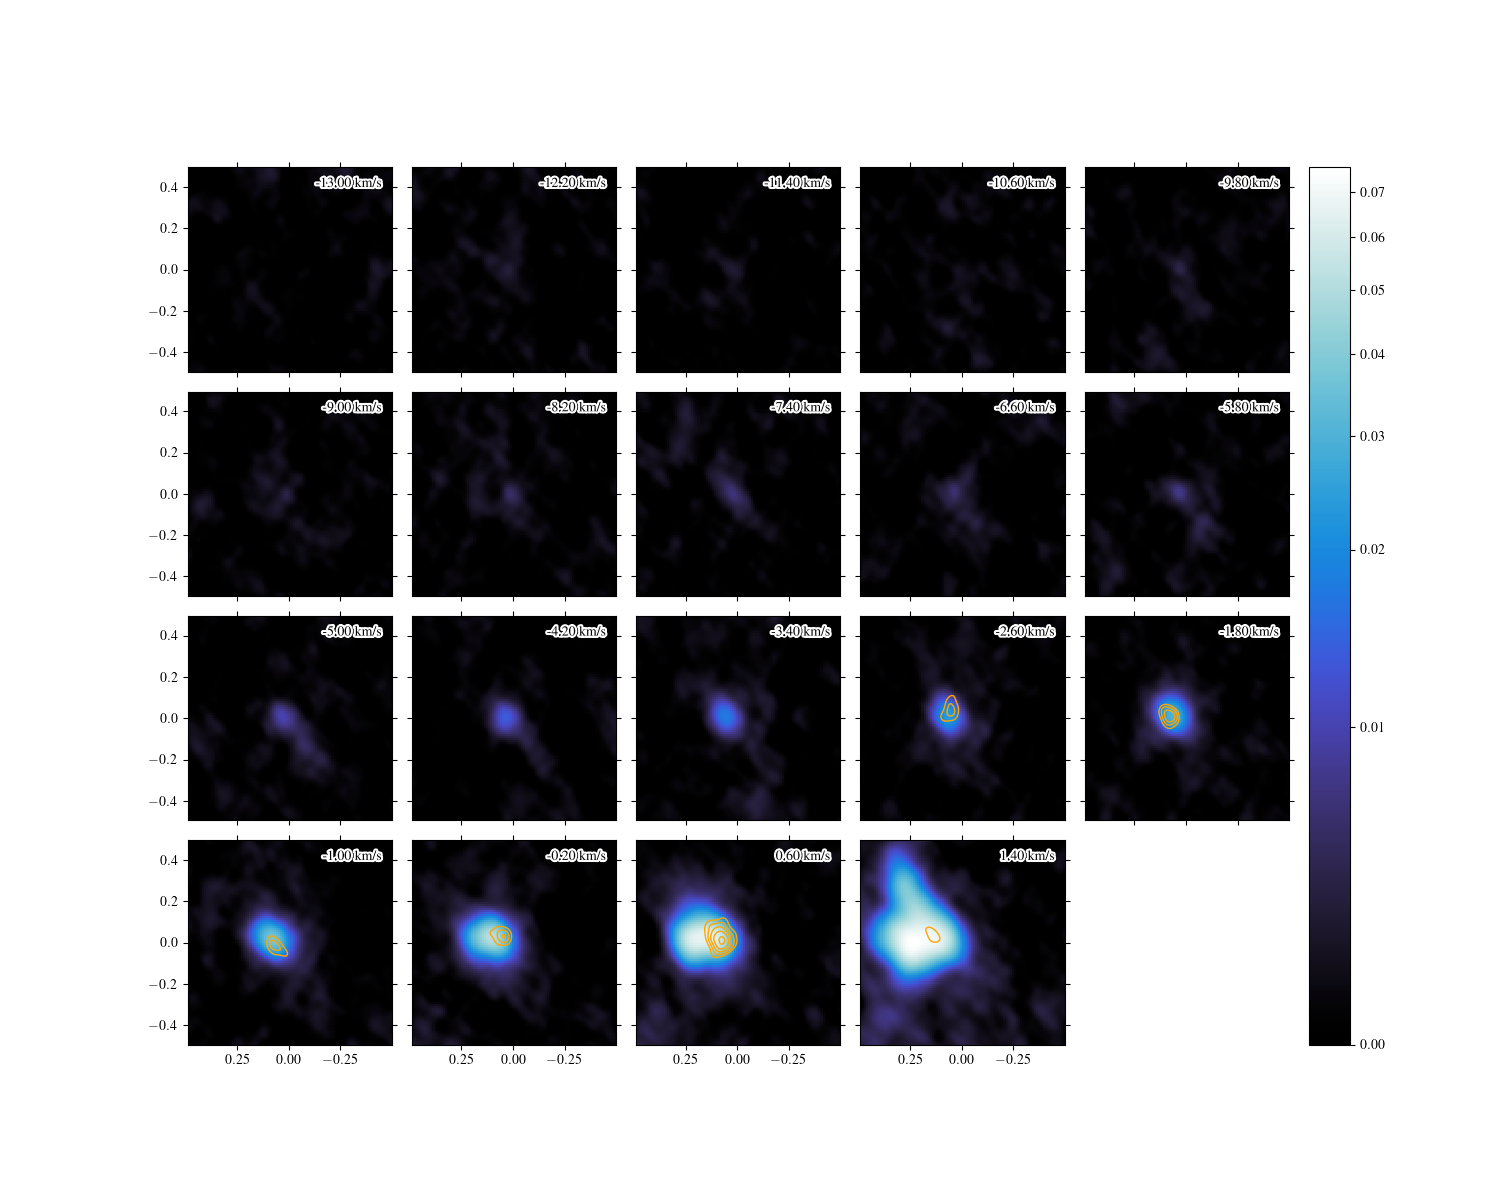

In [2]:
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace(".image.fits", "_dv0.8.image.fits")
rmax = 0.5
chanmap = ChannelMap(imagename, center_coord=center_coord, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=(-13, 2), downsample=(1, 1))
chanmap.set_imagegrid(pad=0.2)
chanmap.plot_colormap(cmap=eplot.cmap["M0"], vmin=0.0, stretch=AsinhStretch())

imagename = au.customimagepath + au.get_image_basename(source, config, "SO", robust=robust).replace(".image.fits", "_dv0.2.image.fits")
image = FitsImage(imagename)
image.estimate_rms(edgenchan=3)

chanmap.overlay_contour(fitsname_or_data=imagename, data_scaling_factor=1e3, levels=np.array([4, 5, 6, 7, 8, 9, 10])*image.rms*1e3, color="orange")

In [18]:
chanmap.fig.savefig(au.figurepath + "12CO_SO_channelmap_comparison_blue.pdf", bbox_inches="tight", pad_inches=0.01)